In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow.keras import optimizers
from datetime import datetime

In [2]:
date = datetime.now()
date = date.strftime("%d/%m/%Y_%H:%M")
arq = datetime.now()
arq = arq.strftime("%d_%m_%Y_%H_%M")


In [3]:
Npontos = 200 #Tempo de dados 200
features = 6
lista_ativ = 18
colunas_interesse = []
for i in range(lista_ativ):
    colunas_interesse.append('atividade_'+str(i))

In [4]:
dataset = pd.read_csv('normalizado.csv')
dataset

,pessoa_x,tempo,acelerômetro_X,acelerômetro_Y,acelerômetro_Z,giroscópio_X,giroscópio_Y,giroscópio_Z,atividade_0,atividade_1,...,atividade_8,atividade_9,atividade_10,atividade_11,atividade_12,atividade_13,atividade_14,atividade_15,atividade_16,atividade_17
0,1600,90426757696641,0.616106,0.792659,0.903685,0.216118,-0.658304,-0.223939,True,False,...,False,False,False,False,False,False,False,False,False,False
1,1600,90426807196641,0.371614,0.786319,0.789384,0.261602,-0.390209,-0.044416,True,False,...,False,False,False,False,False,False,False,False,False,False
2,1600,90426856696641,0.307257,0.793112,0.768011,0.062944,-0.118576,-0.145535,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1600,90426906196641,0.445166,0.623742,1.104409,0.042208,0.189840,-0.118424,True,False,...,False,False,False,False,False,False,False,False,False,False
4,1600,90426955696641,0.571838,0.854701,1.483555,0.064282,0.498256,-0.011442,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3173930,1650,2426184371437252,0.212891,-0.541440,1.169314,-1.774964,1.386521,0.576652,False,False,...,False,False,False,False,False,False,False,False,False,True
3173931,1650,2426184421424592,0.120270,-1.693517,0.643342,-1.809746,1.227361,0.870484,False,False,...,False,False,False,False,False,False,False,False,False,True
3173932,1650,2426184471411932,0.480197,-1.664081,0.597343,-1.875296,1.049810,1.404657,False,False,...,False,False,False,False,False,False,False,False,False,True
3173933,1650,2426184521399272,0.536382,-2.074826,0.258156,-2.002384,1.080227,2.065595,False,False,...,False,False,False,False,False,False,False,False,False,True


In [5]:
for coluna in colunas_interesse:
    dataset[coluna] = dataset[coluna].astype(int)

In [6]:
def cria_IN_OUT(data, janela, features):
    OUT_indices = np.arange(janela, len(data), janela)
    OUT = data[OUT_indices]

    IN_indices = [range(i-janela, i) for i in OUT_indices]
    IN = data[np.array(IN_indices).flatten()]
    IN = np.reshape(IN, (len(OUT), janela, features))
    IN_final = IN[:, :, :]
    return IN_final
#data = quantidade total de dados
#janela = número de pontos de cada série
#features = quais tipos de dados cada ponto recebe

In [7]:
featuresX = ['acelerômetro_X', 'acelerômetro_Y', 'acelerômetro_Z', 'giroscópio_X', 'giroscópio_Y', 'giroscópio_Z']
colunas_label = []
for i in range(lista_ativ):
    colunas_label.append('atividade_'+str(i))
features = dataset[['acelerômetro_X', 'acelerômetro_Y', 'acelerômetro_Z', 'giroscópio_X', 'giroscópio_Y', 'giroscópio_Z']]
rotulos = dataset[colunas_label]

X_train, X_temp, Y_train, Y_temp = train_test_split(features, rotulos, test_size=0.3, random_state=42, shuffle=False)

X_test, X_val, Y_test, Y_val = train_test_split(X_temp, Y_temp, test_size=0.33, random_state=42, shuffle=False)

print("Shape do conjunto de treino (X):", X_train.shape)
print("Shape do conjunto de treino (Y):", Y_train.shape)
print("Shape do conjunto de teste (X):", X_test.shape)
print("Shape do conjunto de teste (Y):", Y_test.shape)
print("Shape do conjunto de validação (X):", X_val.shape)
print("Shape do conjunto de validação (Y):", Y_val.shape)


Shape do conjunto de treino (X): (2221754, 6)
Shape do conjunto de treino (Y): (2221754, 18)
Shape do conjunto de teste (X): (637961, 6)
Shape do conjunto de teste (Y): (637961, 18)
Shape do conjunto de validação (X): (314220, 6)
Shape do conjunto de validação (Y): (314220, 18)


In [8]:
array_treino = X_train.values
array_teste = X_test.values
array_val = X_val.values

In [9]:
trainX = cria_IN_OUT(array_treino, Npontos, len(featuresX))
testX = cria_IN_OUT(array_teste, Npontos, len(featuresX))
valX = cria_IN_OUT(array_val, Npontos, len(featuresX))

In [10]:
array_label_treino = Y_train[colunas_interesse].values
array_label_teste = Y_test[colunas_interesse].values
array_label_val = Y_val[colunas_interesse].values

In [11]:
def f(x, n):
    y = np.array([-1]*x.shape[1])
    y = np.vstack([y,x[0]])
    y = np.delete(y, (0), axis=0)
    for i, linha in enumerate(x):
        if i == 0: continue
        if i % n == 0:
            y = np.vstack([y, linha])
    y = y[:-1]
    return y

In [12]:
trainY = f(array_label_treino, Npontos)
testY = f(array_label_teste, Npontos)
valY = f(array_label_val, Npontos)

In [195]:
print("Shape do conjunto de treino (X):", trainX.shape)
print("Shape do conjunto de treino (Y):", trainY.shape)
print("Shape do conjunto de teste (X):", testX.shape)
print("Shape do conjunto de teste (Y):", testY.shape)
print("Shape do conjunto de validação (X):", valX.shape)
print("Shape do conjunto de validação (Y):", valY.shape)


Shape do conjunto de treino (X): (11108, 200, 6)
Shape do conjunto de treino (Y): (11108, 18)
Shape do conjunto de teste (X): (3189, 200, 6)
Shape do conjunto de teste (Y): (3189, 18)
Shape do conjunto de validação (X): (1571, 200, 6)
Shape do conjunto de validação (Y): (1571, 18)


In [14]:
trainY[0]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [196]:
def teste_label(dados, label):
    errados = []
    errado = 0;
    for x in range(len(label)):
        for i in range(18):
            if label[x][i] == 1:
                a = dataset[(dataset["acelerômetro_X"] == dados[x][0][0]) & (dataset["acelerômetro_Y"] == dados[x][0][1]) & (dataset["acelerômetro_Z"] == dados[x][0][2]) & (dataset["giroscópio_X"] == dados[x][0][3]) & (dataset["giroscópio_Y"] == dados[x][0][4]) & (dataset["giroscópio_Z"] == dados[x][0][5])]
                a = a["atividade_" + str(i)].values[0]
                if(a != 1):
                    errado = errado+1
                    errados.append(x)
    print(errado)
    print(errados)



In [197]:
teste_label(trainX, trainY)
teste_label(testX, testY)
teste_label(valX, valY)

0
[]
0
[]
6
[1149, 1150, 1151, 1152, 1153, 1154]


In [182]:
accx = valX[1247][3][0]
accy = valX[1247][3][1]
accz = valX[1247][3][2]
grrx = valX[1247][3][3]
grry = valX[1247][3][4]
grrz = valX[1247][3][5]
a = dataset[(dataset["acelerômetro_X"] == accx) & (dataset["acelerômetro_Y"] == accy) & (dataset["acelerômetro_Z"] == accz) & (dataset["giroscópio_X"] == grrx) & (dataset["giroscópio_Y"] == grry) & (dataset["giroscópio_Z"] == grrz)]
a

,pessoa_x,tempo,acelerômetro_x,acelerômetro_Y,acelerômetro_Z,giroscópio_x,giroscópio_Y,giroscópio_Z,atividade_0,atividade_1,...,atividade_8,atividade_9,atividade_10,atividade_11,atividade_12,atividade_13,atividade_14,atividade_15,atividade_16,atividade_17
3283300,1649,2724229317436321,0.799133,0.195732,0.433993,-1.345248,-0.27764,0.291229,0,0,...,0,0,0,0,1,0,0,0,0,0
3284459,1649,2724229317436321,0.799133,0.195732,0.433993,-1.345248,-0.27764,0.291229,0,0,...,0,0,0,0,0,1,0,0,0,0


In [158]:
# taxa de aprendizado padrão ADAM 0.001
optimizer = optimizers.Adam()

In [15]:
def cria_LSTM(hidden_units, dense_units, input_shape, activation, optimizer):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.LSTM(hidden_units, input_shape=input_shape, activation=activation[0], return_sequences=False))
  model.add(tf.keras.layers.Dropout(rate=0.3))
  model.add(tf.keras.layers.Dense(units=dense_units, activation=activation[1]))
  model.compile(loss='categorical_crossentropy', optimizer ='adam', metrics=['accuracy'])
  return model

model = cria_LSTM(hidden_units=160, dense_units=lista_ativ, input_shape=(Npontos, len(featuresX)), activation=['tanh', 'softmax'], optimizer=optimizer)



In [16]:
def reset_model():
  global model
  model = cria_LSTM(hidden_units=160, dense_units=lista_ativ, input_shape=(Npontos, len(featuresX)), activation=['tanh', 'softmax'], optimizer=tf.keras.optimizers.Adam())

In [18]:
reset_model()
history = model.fit(trainX, trainY, epochs = 70, batch_size = 30, verbose = 1,  validation_data=(valX, valY), use_multiprocessing=True)

Epoch 1/70
393/393 [==============================] - 55s 135ms/step - loss: 2.1727 - accuracy: 0.2815 - val_loss: 1.9844 - val_accuracy: 0.3671
Epoch 2/70
393/393 [==============================] - 50s 128ms/step - loss: 1.9809 - accuracy: 0.3554 - val_loss: 2.3658 - val_accuracy: 0.3221
Epoch 3/70
393/393 [==============================] - 50s 128ms/step - loss: 1.8973 - accuracy: 0.3761 - val_loss: 1.8962 - val_accuracy: 0.4031
Epoch 4/70
393/393 [==============================] - 52s 132ms/step - loss: 1.8287 - accuracy: 0.4055 - val_loss: 1.8145 - val_accuracy: 0.4193
Epoch 5/70
393/393 [==============================] - 49s 125ms/step - loss: 1.7398 - accuracy: 0.4238 - val_loss: 1.8566 - val_accuracy: 0.4037
Epoch 6/70
393/393 [==============================] - 50s 128ms/step - loss: 1.8412 - accuracy: 0.3944 - val_loss: 1.9916 - val_accuracy: 0.3221
Epoch 7/70
393/393 [==============================] - 49s 124ms/step - loss: 1.7312 - accuracy: 0.4288 - val_loss: 1.8699 - val_ac

C:\Users\rapha\AppData\Local\Temp\ipykernel_312\3353431786.py:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,1,1)


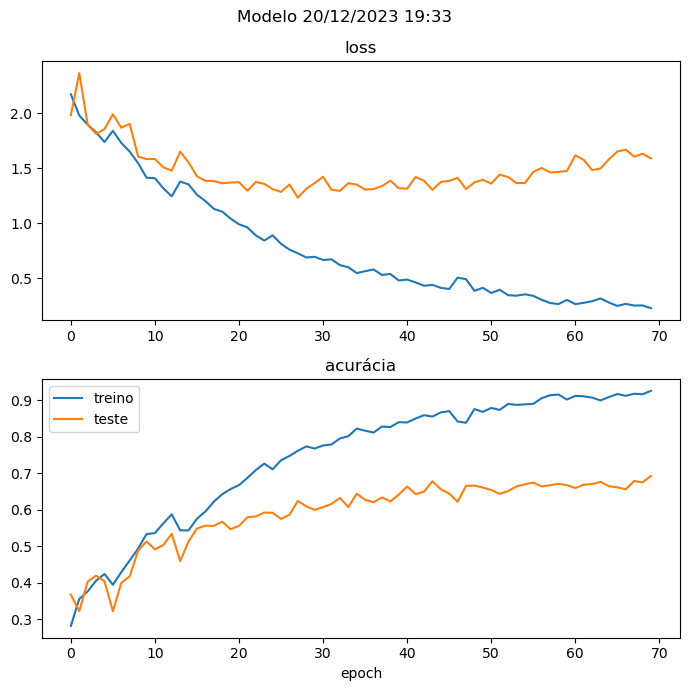

In [19]:
date = datetime.now()
date = date.strftime("%d/%m/%Y %H:%M")
arq = datetime.now()
arq = arq.strftime("%d_%m_%Y_%H_%M")

plt.figure(figsize= (7,7))
plt.title(f"Gráfico Treino e Teste {date}")
plt.subplot(2,1,1)
plt.title("loss")
plt.plot(history.history['loss'], label = 'Treino')
plt.plot(history.history['val_loss'], label='Validação')

plt.subplot(2,1,2)
plt.title("acurácia")
plt.plot(history.history['accuracy'], label = 'Treino')
plt.plot(history.history['val_accuracy'], label='Validação')
plt.legend(['treino', 'teste'])
plt.xlabel('epoch')

plt.suptitle('Modelo {}'.format(date))
plt.savefig('Plots/%s' % arq)
plt.tight_layout()

AttributeError: 'Axes' object has no attribute 'flatten'

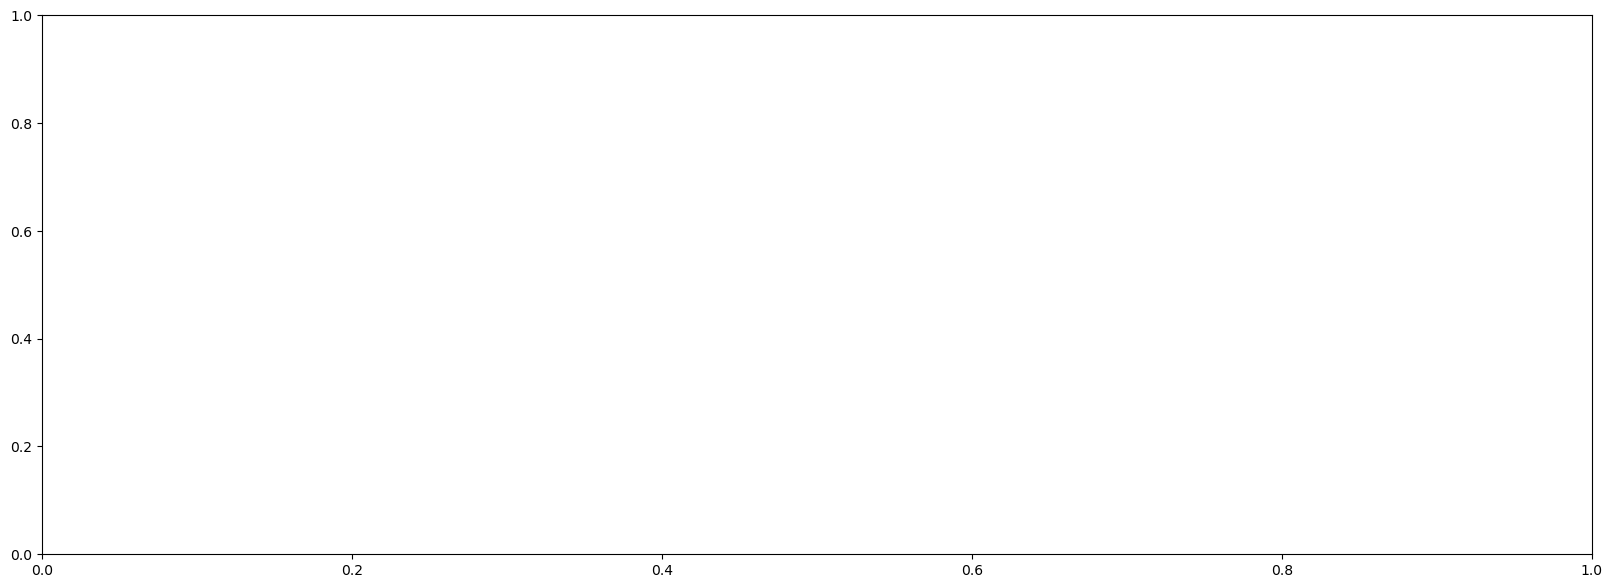

In [ ]:

nome = 'Acurácia_{}'.format(date)

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 7))
axes = axes.flatten()

for i in range(len(historico)):
    ax = axes[i]
    ax.set_title(f'Acurácia - Treino {i + 1}')
    ax.plot(historico[i].history['accuracy'], label='Treino')
    ax.plot(historico[i].history['val_accuracy'], label='Validação')
    ax.set_xlabel('Épocas')
    ax.set_ylabel('Acurácia')
    ax.set_ylim(0, 1)
    ax.legend()

plt.suptitle('Acurácia {}'.format(date))
plt.savefig('Plots/%s' % arq)
plt.tight_layout()